<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Use-creek" data-toc-modified-id="Use-creek-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use creek</a></span></li><li><span><a href="#Composition-of-creeks-using-lined" data-toc-modified-id="Composition-of-creeks-using-lined-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Composition of creeks using lined</a></span></li><li><span><a href="#analogue-of-iterize-for-creek" data-toc-modified-id="analogue-of-iterize-for-creek-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>analogue of iterize for creek</a></span></li><li><span><a href="#Transform-mapping-into-a-function" data-toc-modified-id="Transform-mapping-into-a-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transform mapping into a function</a></span><ul class="toc-item"><li><span><a href="#example-on-creek" data-toc-modified-id="example-on-creek-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>example on creek</a></span></li></ul></li><li><span><a href="#Rewriting-Christian's-functions-with-creek" data-toc-modified-id="Rewriting-Christian's-functions-with-creek-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rewriting Christian's functions with creek</a></span><ul class="toc-item"><li><span><a href="#package-everything-using-lined" data-toc-modified-id="package-everything-using-lined-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>package everything using lined</a></span></li></ul></li></ul></div>

# Use creek

In [109]:
from creek import Creek
from functools import partial

/Users/Thor.Whalen/.pyenv/versions/3.8.6/envs/p3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


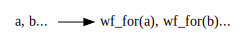

In [1]:
from ut import dgdisp

dgdisp("""
rankdir=LR
categories -> wfs_for_each_category 
categories [label="a, b..." shape=none]
wfs_for_each_category [label="wf_for(a), wf_for(b)..." shape=none]
""")

In [13]:
# TW: For ascii version (practical to paste in .py modules)
from lined import dot_to_ascii  # pull, because was lined.util, but added reference at top
print(dot_to_ascii("""
rankdir=LR
categories -> wfs_for_each_category 
categories [label="a, b..." shape=none]
wfs_for_each_category [label="wf_for(a), wf_for(b)..." shape=none]
"""))


 a, b...  ──▶  wf_for(a), wf_for(b)...



In [52]:
# SB
cat_map = {'a': [1,2,3], 'b': [4,5,6]}
class SbCatCreek(Creek):
    def data_to_obj(self, item):
         return cat_map[item]

get_sb_cat_creek = lambda: SbCatCreek

src = 'aabbaab'
stream= SbCatCreek(src)
assert list(stream) == [[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]

In [53]:
# TW: You want to be able to make CatCreeks with different cat_maps. Choices: factory function, or subclass
from creek import Creek

class TwCatCreek(Creek):
    def __init__(self, stream, cat_map):
        super().__init__(stream)
        self.cat_map = cat_map
        
    def data_to_obj(self, item):
         return self.cat_map[item]

get_tw_cat_creek = lambda: TwCatCreek

stream= TwCatCreek(
    stream='aabbaab', 
    cat_map = {'a': [1,2,3], 'b': [4,5,6]}
)

assert list(stream) == [[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]

# Note: can use get_stream = partial(CatCreek, cat_map=...) to fix the mapping

# Composition of creeks using lined

In [54]:
# SB
class IdCreek(Creek):
    def data_to_obj(self, item):
         return item
        
from lined import Line

CatCreek = get_sb_cat_creek()

pipe = Line(IdCreek, CatCreek)

# composing the creeks
src2 = 'aabbaab'
assert list(pipe(src2)) == [[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]

i2.signatures.Sig

In [103]:
# TW
# First, note that you could have done: pipe = Line(Creek, CatCreek) since Creek's default transformations are identities
# Second, you could use LineParametrized here.

class IdCreek(Creek):
    def data_to_obj(self, item):
         return item
        
from lined import LineParametrized

CatCreek = get_tw_cat_creek()

pipe = LineParametrized(IdCreek, CatCreek)

assert list(pipe(src, cat_map=cat_map)) == [[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]
print(pipe.dot_digraph_ascii())

              ┌────────────┐
 cat_map  ──▶ │ TwCatCreek │ ──▶  output
              └────────────┘
                ▲
                │ stream
                │
              ┌────────────┐
 stream   ──▶ │  IdCreek   │
              └────────────┘



# analogue of iterize for creek

In [104]:
print(dot_to_ascii("""
rankdir=LR
categories -> wfs_for_each_category -> transformed_wf_for_each_category 
categories [label="a, b..." shape=none]
wfs_for_each_category [label="wf_for(a), wf_for(b)..." shape=none]
transformed_wf_for_each_category [label="transf_wf, transf_wf_b..." shape=none]
"""))


 a, b...  ──▶  wf_for(a), wf_for(b)...  ──▶  transf_wf, transf_wf_b...



In [147]:
def creek_iterize(f, stream):
    m = Creek(stream)
    m.data_to_obj = f
    return m

def func_to_creek(func):
    return partial(creek_iterize, func)

In [148]:
stream = [1,2,3]
def double(item):
    return 2*item
f= double

assert list(func_to_creek(double)(stream)) == [2, 4, 6]

# Transform mapping into a function

In [149]:
def dict_to_func(d):
    def f(item):
        try:
            return d[item]
        except KeyError:
            raise
    return f

# import pickle
# pickle.loads(pickle.dumps(dict_to_func(cat_map))) 
## AttributeError: Can't pickle local object 'dict_to_func.<locals>.f'

# TW: Why not:
def dict_to_func(d):
    return d.__getitem__

import pickle
pickle.loads(pickle.dumps(dict_to_func(cat_map)))  # it's pickle-able

def dict_as_param(func):
    def g(d):
        return func(**d)

    return g
    


In [150]:
g = dict_to_func(cat_map)
assert g('a') == [1, 2, 3]

In [151]:
func = lambda x, y: x + y
f = dict_as_param(func)
assert f(dict(x=2, y=3)) == 5
# but note that f isn't pickle-able

## example on creek

In [152]:
src = 'aabbaab'
stream= func_to_creek(dict_to_func(cat_map))(src)
list(stream)

[[1, 2, 3], [1, 2, 3], [4, 5, 6], [4, 5, 6], [1, 2, 3], [1, 2, 3], [4, 5, 6]]

# Rewriting Christian's functions with creek

In [153]:
# Christian's initial function
def annot_timestamping(n_annot, start, end, wiggle=100):
    """
    Make synthetic timestamps
    """
    base = list(np.linspace(start, end, n_annot))
    wiggled = (
        base[0:1]
        + [i + np.random.randint(-wiggle, wiggle) for i in base[1:-1]]
        + base[-1:]
    )
    return wiggled



In [154]:
cat_lin_map = {
    'a': dict(start=1, stop=25, num=12),
    'b': dict(start=0, stop=5, num=30),
    }

In [155]:
src = 'aabbaab'
stream = Line(dict_to_func, func_to_creek)(cat_lin_map)(src)

In [156]:
list(stream)

[{'start': 1, 'stop': 25, 'num': 12},
 {'start': 1, 'stop': 25, 'num': 12},
 {'start': 0, 'stop': 5, 'num': 30},
 {'start': 0, 'stop': 5, 'num': 30},
 {'start': 1, 'stop': 25, 'num': 12},
 {'start': 1, 'stop': 25, 'num': 12},
 {'start': 0, 'stop': 5, 'num': 30}]

In [157]:
import numpy as np
p = Line(dict_as_param, func_to_creek)(np.linspace)

In [158]:
list(p(stream))[:3]

[array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([0.        , 0.17241379, 0.34482759, 0.51724138, 0.68965517,
        0.86206897, 1.03448276, 1.20689655, 1.37931034, 1.55172414,
        1.72413793, 1.89655172, 2.06896552, 2.24137931, 2.4137931 ,
        2.5862069 , 2.75862069, 2.93103448, 3.10344828, 3.27586207,
        3.44827586, 3.62068966, 3.79310345, 3.96551724, 4.13793103,
        4.31034483, 4.48275862, 4.65517241, 4.82758621, 5.        ])]

In [159]:
dict_as_param(np.linspace)({'start': 1, 'stop': 25, 'num': 12})

array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
       11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
       22.81818182, 25.        ])

In [161]:
# list(iterize(f)([1,2,3]))  # f?

In [162]:
# wiggle an array
def wiggle(arr, wig_factor):
    wiggling = np.random.randint(-wig_factor, wig_factor, len(arr)) 
    wiggling[0]=0
    wiggling[-1]=0
       
    return arr+wiggling

def wiggle_by(wig_factor):
    return partial(wiggle, wig_factor=wig_factor)


## package everything using lined

symbols -> Iterable[dict] -> Iterable[np.array] ---(wiggle each array)--> Iterable[np.array]

In [163]:
# This replaces the function annot_timestamping
src = 'aabbaab'
p1 = Line(dict_to_func, func_to_creek)(cat_lin_map)
stream = p1(src)
p2 = Line(dict_as_param, func_to_creek)(np.linspace)
stream_final = p2(stream)
list(stream_final)[:3]

[array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([ 1.        ,  3.18181818,  5.36363636,  7.54545455,  9.72727273,
        11.90909091, 14.09090909, 16.27272727, 18.45454545, 20.63636364,
        22.81818182, 25.        ]),
 array([0.        , 0.17241379, 0.34482759, 0.51724138, 0.68965517,
        0.86206897, 1.03448276, 1.20689655, 1.37931034, 1.55172414,
        1.72413793, 1.89655172, 2.06896552, 2.24137931, 2.4137931 ,
        2.5862069 , 2.75862069, 2.93103448, 3.10344828, 3.27586207,
        3.44827586, 3.62068966, 3.79310345, 3.96551724, 4.13793103,
        4.31034483, 4.48275862, 4.65517241, 4.82758621, 5.        ])]